In [1]:
# Import standard packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

# Import additional packages
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import f
from scipy.stats import t

alpha = 0.05
p = 3
n = 12

x = pd.read_csv('Project5.csv')
x.insert(0, 'intercept', np.ones(len(x)))
data = x.values * 1.0
df = pd.DataFrame(data, columns = ['intercept', 'X1', 'X2', 'X3', 'Y'])

# Do the simple linear regression
model = ols('Y ~ X1 + X2 + X3', df).fit()
beta = model.params
print('参数估计值: \n', round(beta, 4))
X = data[:,0:p+1]
Y = data[:,-1]
Y_hat = model.fittedvalues 
model.summary()



参数估计值: 
 Intercept   -266.0312
X1             0.0107
X2             3.1348
X3             1.8674
dtype: float64


D:\Program_Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     11.12
Date:                Tue, 06 Apr 2021   Prob (F-statistic):            0.00317
Time:                        17:57:20   Log-Likelihood:                -40.708
No. Observations:                  12   AIC:                             89.42
Df Residuals:                       8   BIC:                             91.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -266.0312     92.674     -2.871      0.021    -479.737     -52.325
X1             0.0107      0.004      2.390      0.044       0.000       0.021
X2             3.1348      0.844      3.712      0.006       1.188       5.082
X3             1.8674      0.535      3.494      0.008       0.635       3.100
==============================================================================
Omnibus:                        0.392   Durbin-Watson:                   1.043
Prob(Omnibus):                  0.822   Jarque-Bera (JB):                0.230
Skew:                          -0.282   Prob(JB):                        0.891
Kurtosis:                       2.625   Cond. No.                     9.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [2]:
# 输出一元线性回归方程
print('Y_hat =', round(beta[0], 4), '+', round(beta[1], 4), '* X1 +', round(beta[2], 4), '* X2 +', round(beta[3], 4), '* X3')


Y_hat = -266.0312 + 0.0107 * X1 + 3.1348 * X2 + 1.8674 * X3


In [4]:
# 求均值
X_mean = []
for k in range(p + 1):
    X_mean.append(np.mean(data[:, k]))  # 自变量 x 的均值
Y_mean = np.mean(data[:, -1])  # 因变量 y 的均值

# 数据中心化
X_cent = X * 1.0
X_cent[:,1:4] = X[:,1:4] - X_mean[1:4]
Y_cent = Y - Y_mean

# Do the simple linear regression
df = pd.DataFrame(X_cent, columns = ['intercept', 'P1_cent', 'P2_cent', 'P3_cent'])
df['F_cent'] = Y_cent
model_cent = ols('F_cent ~ P1_cent + P2_cent + P3_cent', df).fit()
beta_cent = model_cent.params
print('参数估计值: \n', round(beta_cent, 4))
Y_hat_cent = model_cent.fittedvalues
model_cent.summary()

参数估计值: 
 Intercept   -0.0000
P1_cent      0.0107
P2_cent      3.1348
P3_cent      1.8674
dtype: float64


D:\Program_Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 F_cent   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     11.12
Date:                Tue, 06 Apr 2021   Prob (F-statistic):            0.00317
Time:                        17:57:45   Log-Likelihood:                -40.708
No. Observations:                  12   AIC:                             89.42
Df Residuals:                       8   BIC:                             91.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.776e-16      2.544  -1.09e-16      1.000      -5.866       5.866
P1_cent        0.0107      0.004      2.390      0.044       0.000       0.021
P2_cent        3.1348      0.844      3.712      0.006       1.188       5.082
P3_cent        1.8674      0.535      3.494      0.008       0.635       3.100
==============================================================================
Omnibus:                        0.392   Durbin-Watson:                   1.043
Prob(Omnibus):                  0.822   Jarque-Bera (JB):                0.230
Skew:                          -0.282   Prob(JB):                        0.891
Kurtosis:                       2.625   Cond. No.                         574.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
# 输出一元线性回归方程
print('Y_hat_cent =', round(beta_cent[0], 4), '+ (', round(beta_cent[1], 4), '* X1_cent) + (', round(beta_cent[2], 4), '* X2_cent) + (', round(beta[3], 4), '* X3)')


Y_hat_cent = -0.0 + ( 0.0107 * X1_cent) + ( 3.1348 * X2_cent) + ( 1.8674 * X3)


In [10]:
# 求解相关项
SSE = sum((Y - Y_hat) ** 2)
SST = sum((Y - Y_mean) ** 2)
SSR = sum((Y_hat - Y_mean) ** 2)

sigma2 = SSE / (n - p - 1)  # 方差
sigma = np.sqrt(sigma2)  # 标准差

c = np.dot(X.T, X)
C = np.linalg.inv(c)  # 求逆
# print(C)

In [7]:
# 计算F0
F0 = (SSR / p) / (SSE / (n - p - 1))
# F0 = model.fvalue
print('F0: ', round(F0, 2))
F = round(f.ppf(0.95, dfn = p,dfd = n - p - 1), 2)

# 法1：
pVal1 = f.sf(F0, p, n - p - 1)
# pVal1 = model.f_pvalue
print('pVal1: ', round(pVal1, 2))
if pVal1 < alpha:
    print('\nSince p-value < 0.05, reject H0.')
else:
    print('\nAccept H0.') 

# 法2：
if F0 > F:
    print('Since F0 > F(0.95, 2, 19) = ', F, ', reject H0.')
else:
    print('Accept H0.') 

F0:  11.12
pVal1:  0.0

Since p-value < 0.05, reject H0.
Since F0 > F(0.95, 2, 19) =  4.07 , reject H0.


In [8]:
# t检验
t0 = []
for i in range(p + 1):   
    t0.append(beta[i] / (np.sqrt(C[i][i] * sigma2)))  # 求t值
# t0 = model.tvalues
print('t0值为：', np.round(t0, 4))
tVal = t.ppf(1 - alpha / 2, n - p - 1)
print('t的临界值为：', np.round(tVal, 4))
pVal2 = []
for i in range(p + 1):
    P = t.sf(abs(t0[i]), n - p - 1)
    pVal2.append(P)  # 已知临界值求p值
print('P值为：', np.round(pVal2, 4))

print('\n')
# 法1：
for i in range(p):
    if pVal2[i + 1] < alpha:
        print ('Since p%d-value < 0.05, reject H0%d'%(i + 1, i + 1), '.')
    else:
        print('Accept H0%d'%(i + 1), '.')
print('\n')   

# 法2：
for i in range(p):
    if abs(t0[i + 1]) > tVal:
        print('Since t0%d > t(0.975, 19) = '%(i + 1), round(tVal, 4), ', reject H0%d'%(i + 1), '.')
    else:
        print('Accept H0%d'%(i + 1), '.') 

t0值为： [-2.8706  2.3896  3.7123  3.4936]
t的临界值为： 2.306
P值为： [0.0104 0.0219 0.003  0.0041]


Since p1-value < 0.05, reject H01 .
Since p2-value < 0.05, reject H02 .
Since p3-value < 0.05, reject H03 .


Since t01 > t(0.975, 19) =  2.306 , reject H01 .
Since t02 > t(0.975, 19) =  2.306 , reject H02 .
Since t03 > t(0.975, 19) =  2.306 , reject H03 .


In [11]:
R2 = SSR / SST
print(round(R2, 4))

0.8065


In [72]:
# 计算期末成绩的残差
data_res = data * 1.0  # 乘1.0 不然会损失精度
for i in range(n):
    data_res[:, p + 1] = Y - Y_hat
df = pd.DataFrame(data_res, columns = ['intercept', 'P1', 'P2', 'P3', 'F_res'])
print(df.head())

   intercept      P1    P2     P3      F_res
0        1.0  2000.0  90.0  100.0   0.731289
1        1.0  1800.0  94.0   95.0 -13.328247
2        1.0  2400.0  88.0  110.0 -11.958476
3        1.0  1900.0  91.0   96.0   3.137442
4        1.0  1600.0  86.0  100.0  11.555798


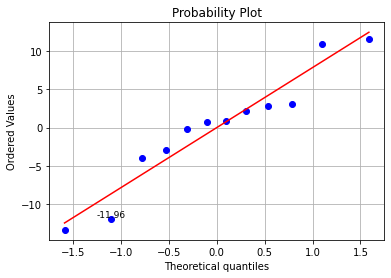

In [79]:
# 残差的正态概率图
res = data_res[:, p + 1]
osm, osr = stats.probplot(res, dist = 'norm', plot = plt)
x = osm[0][1]
y = osm[1][1]
plt.text(x, y, '%.2f' % float(y), ha='center', va= 'bottom', fontsize=9)
plt.grid()
plt.show()

In [80]:
# 异常值检验
MSE = SSE / (n - p - 1)
d = np.abs(y) / np.sqrt(MSE)
if d < 3:
    print('残差', round(y, 2), '不是异常值.')
else:
    print('残差', round(y, 2), '是异常值')

残差 -11.96 不是异常值.


Text(0, 0.5, 'e_i')

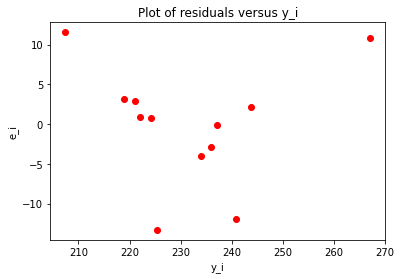

In [75]:
# 残差与预测值的关系图
plt.scatter(Y_hat, res, c = 'red')
plt.title('Plot of residuals versus y_i')
plt.xlabel('y_i')
plt.ylabel('e_i')

In [12]:
# 给定 x_0，求 E(y_0) 的估计值
def confidence_interval(x0):
    x0 = np.array(x0)
    Y0 = np.dot(x0.T, beta)
    delta0 = tVal * sigma * np.sqrt(x0.T @ C @ x0)
    Y0_int = [Y0 - delta0, Y0 + delta0]
    return Y0_int

x0 = [1]
for i in range(p):
    x0.append(int(input()))
print('给定 x = ', x0, ', E(y_0) 的置信区间：', np.round(confidence_interval(x0), 4))

3000
90
100
给定 x =  [1, 3000, 90, 100] , E(y_0) 的置信区间： [226.2457 243.7181]


In [14]:
# 给定 x_0，求 y_0 的预测区间
def confidence_interval(x0):
    x0 = np.array(x0)
    Y0 = np.dot(x0.T, beta)
    delta1 = tVal * sigma * np.sqrt(1 + x0.T @ C @ x0)
    Y0_int = [Y0 - delta1, Y0 + delta1]
    return Y0_int

x0_ = [1]
for i in range(p):
    x0_.append(int(input()))
print('给定 x = ', x0_, ', y_0 的预测区间：', np.round(confidence_interval(x0_), 4))

302
1504
996
给定 x =  [1, 302, 1504, 996] , y_0 的预测区间： [3377.4414 9246.3438]
